In [96]:
#!pip install scikit-learn
#!pip install kneed

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
#from sklearn.cluster import KMeanst
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator



In [3]:
df = pd.read_csv(('C:/Users/abu_s/Desktop/mall customers.csv'))

In [4]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
df.shape

(200, 5)

In [7]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# **Encode Gender**

In [14]:

# use one hot encode from sklearn.preprocessing
Gender_OHE = OneHotEncoder(sparse_output=False)

# Apply the encoder to the categorical column and fit-transform the data
one_hot_encoded = Gender_OHE.fit_transform(df[['Gender']])

# Convert the result into a DataFrame for easier viewing
Gender_one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=Gender_OHE.get_feature_names_out(['Gender']))

Gender_one_hot_encoded.head(3)


,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0


In [16]:
df = pd.concat([df, Gender_one_hot_encoded],axis = 1)

In [18]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)


In [96]:
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0


In [27]:

df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [29]:
df.head(3)

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6


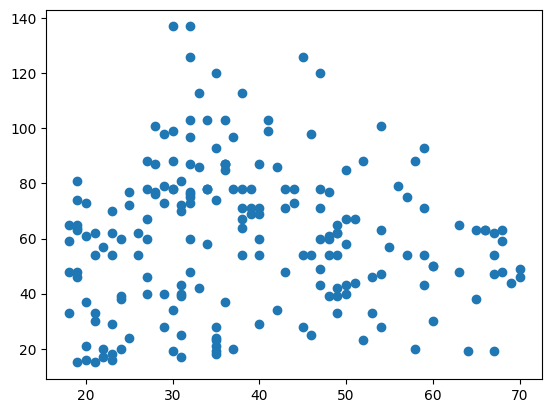

In [31]:
plt.scatter(df.age, df.income)

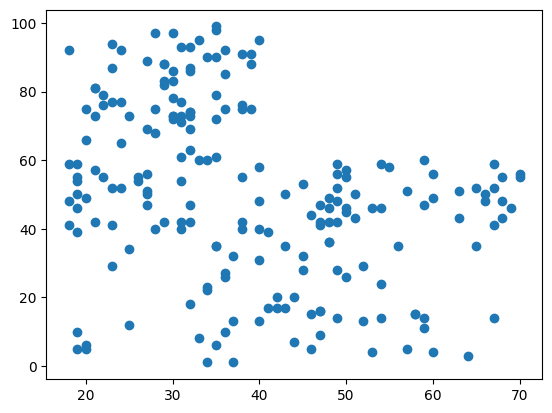

In [59]:
plt.scatter(df.age, df.score)

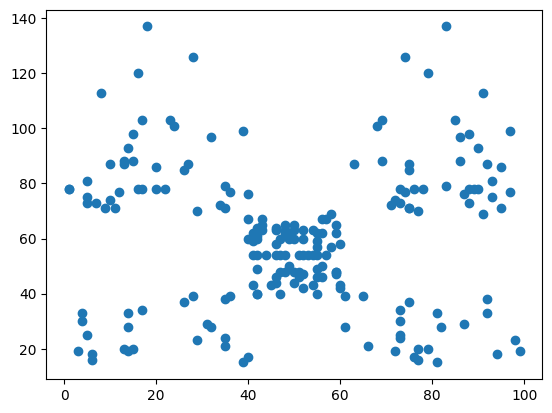

In [61]:

plt.scatter(df.score, df.income)

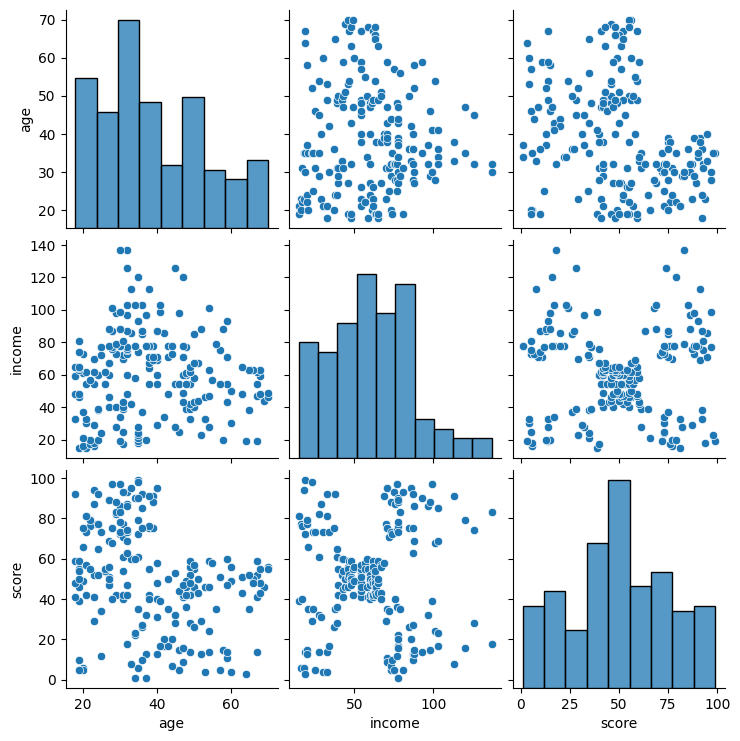

In [63]:
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# **K-MEANS CLUSTER**

Text(0.5, 1.0, 'income and score plot of cutomres')

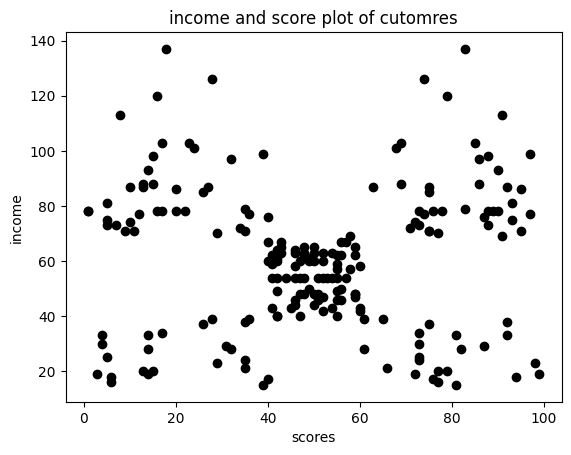

In [65]:
plt.scatter(df.score, df.income, color='black')
plt.xlabel('scores')
plt.ylabel('income')
plt.title('income and score plot of cutomres')

In [66]:
km = KMeans()

In [67]:
km.fit(df[['score', 'income']]) #fit_predict()

KMeans()

In [69]:
df['Group1'] = km.predict(df[['score', 'income']])

In [70]:
km.cluster_centers_ 

array([[ 82.17241379,  78.55172414],
       [ 52.29411765,  59.64705882],
       [ 15.59375   ,  89.40625   ],
       [ 19.52380952,  25.14285714],
       [ 80.04761905,  25.0952381 ],
       [ 82.        , 109.7       ],
       [ 40.14285714,  65.23809524],
       [ 50.8125    ,  44.46875   ]])

In [71]:
df.head(3)

,age,income,score,Gender_Female,Gender_Male,Group1
0,19,15,39,0.0,1.0,3
1,21,15,81,0.0,1.0,4
2,20,16,6,1.0,0.0,3


In [73]:
df0 = df[df.Group1 == 0]
df1 = df[df.Group1 == 1]
df2 = df[df.Group1 == 2]
df3 = df[df.Group1 == 3]
df4 = df[df.Group1 == 4]
df5 = df[df.Group1 == 5]
df6 = df[df.Group1 == 6]
df7 = df[df.Group1 == 7]


In [79]:
df0.head(3)

,age,income,score,Gender_Female,Gender_Male,Group1
123,39,69,91,0.0,1.0,0
125,31,70,77,1.0,0.0,0
127,40,71,95,0.0,1.0,0


In [83]:
df2.head(3)

,age,income,score,Gender_Female,Gender_Male,Group1
128,59,71,11,0.0,1.0,2
130,47,71,9,0.0,1.0,2
134,20,73,5,0.0,1.0,2


In [85]:
centroid = km.cluster_centers_ 
centroid

array([[ 82.17241379,  78.55172414],
       [ 52.29411765,  59.64705882],
       [ 15.59375   ,  89.40625   ],
       [ 19.52380952,  25.14285714],
       [ 80.04761905,  25.0952381 ],
       [ 82.        , 109.7       ],
       [ 40.14285714,  65.23809524],
       [ 50.8125    ,  44.46875   ]])

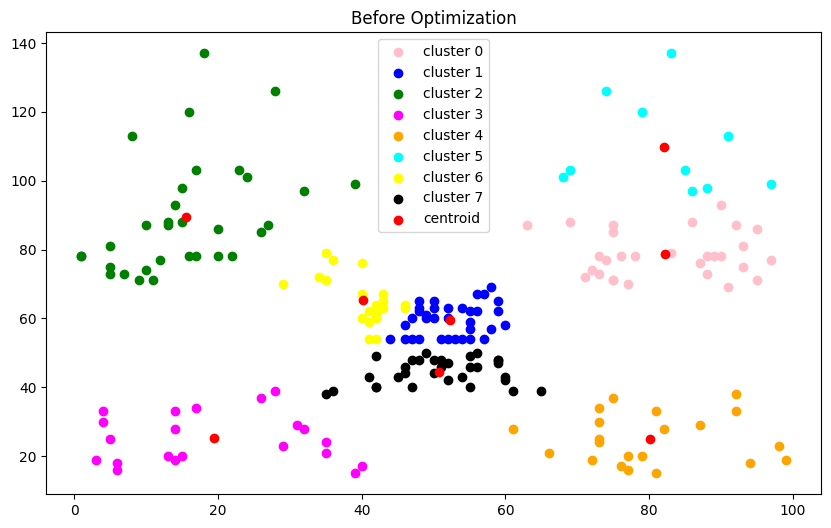

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

plt.scatter(centroid[:, 0], centroid[:,1], color='red', label='centroid')

plt.title('Before Optimization')

plt.legend()

# **Optimizing KMENAS**

In [90]:
wcss = []
cluster = range(1,15)
for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [92]:
wcss

[269981.28,
 184740.39627314545,
 132162.13629759205,
 73679.78903948836,
 44454.476479679724,
 38788.45862332113,
 31600.209115340014,
 25311.63315295815,
 23057.67337237231,
 19669.710998301212,
 19595.277736790154,
 16322.450608370953,
 14952.345013841315,
 13817.297906917644]

Text(0.5, 0, 'Cluster')

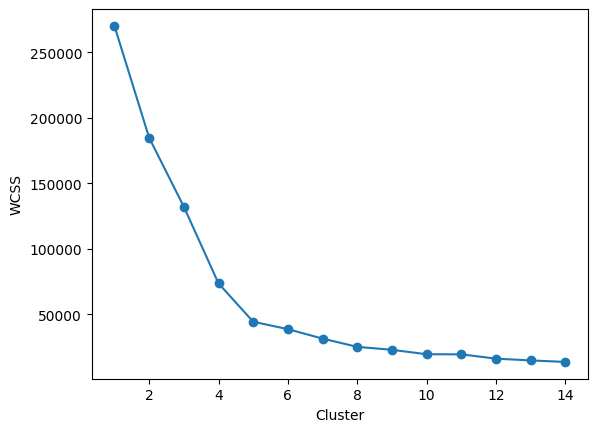

In [95]:
plt.plot(range(1,15), wcss, marker='o') #line plot
plt.ylabel('WCSS')
plt.xlabel('Cluster')

# **Knee Point KneeLocator**

In [105]:
kn = KneeLocator(cluster, wcss, direction='decreasing', curve='convex')

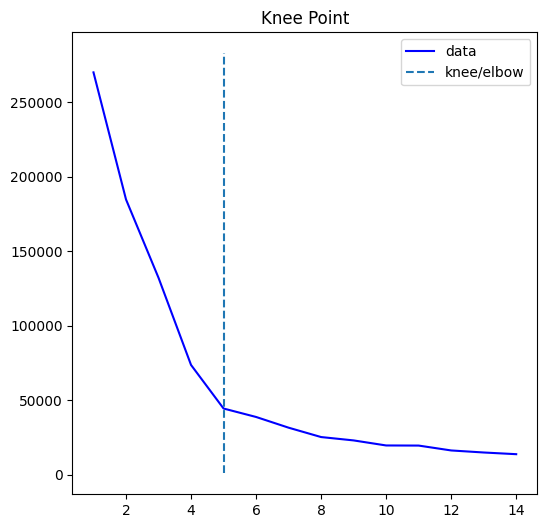

In [107]:
kn.plot_knee()

In [109]:
kn.knee

5

# **After Optimizing**

In [113]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']]) #fit_predict()

In [116]:
df.head(3)

,age,income,score,Gender_Female,Gender_Male,Group1,Group2
0,19,15,39,0.0,1.0,3,4
1,21,15,81,0.0,1.0,4,1
2,20,16,6,1.0,0.0,3,4


In [118]:
cen = km.cluster_centers_
cen

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783]])

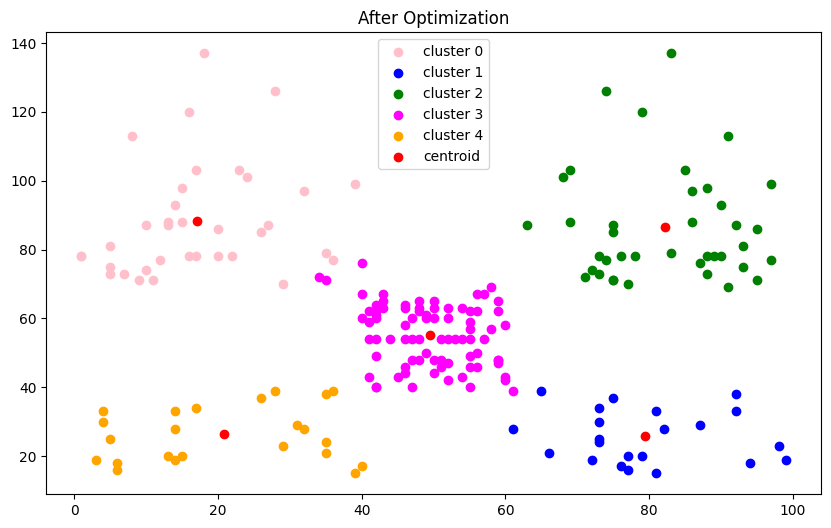

In [120]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid')
plt.title('After Optimization')

plt.legend()